# 1. VISUALIZATION WITH MATPLOTLIB AND SEABORN

### Setting up the system environment for Windows & Linux

In [4]:
import os
import sys

os.environ["JAVA_HOME"] = "JDK 8"
os.environ["PYSPARK_PYTHON"] = sys.executable
os.environ["PYSPARK_DRIVER_PYTHON"] = sys.executable

### Setting up the system environment for Mac

In [2]:
import os
import sys

os.environ["JAVA_HOME"] = "JDK 8/Contents/Home"
os.environ["PYSPARK_PYTHON"] = sys.executable
os.environ["PYSPARK_DRIVER_PYTHON"] = sys.executable

## 1.1. COMMON VISUALS FOR EDA

For the purpose of this program, we are going to cover just a few types of visuals. Among them, we have:

### 1.1.1. Bar chart

Bar Charts in Data Analysis:

• Bar charts, also known as bar graphs, visually represent data in a structured and easy-to-understand format.

• They allow comparison of categories or groups, representing summary values for one discrete level.

• They highlight differences between categories or other discrete data, serving as a screening method for identifying possible relationships.

• Bar charts provide valuable insights when understanding the relationship between two categorical variables.

• They can be used to assess how well a delivery service meets its promises during peak and off-peak hours.

• Bar charts provide a clear and concise way to convey information, making them essential in data analysis.

In [33]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql import types as T
import matplotlib.pyplot as plt
import seaborn as sns
import pandas

In [16]:
# Create a Spark session
spark = SparkSession.builder.appName("SalesAnalysis").getOrCreate()

25/02/06 17:35:50 WARN Utils: Your hostname, Mint-T470 resolves to a loopback address: 127.0.1.1; using 192.168.43.179 instead (on interface wlp4s0)
25/02/06 17:35:50 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/02/06 17:35:51 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [20]:
path = "cleaned_data.csv"
df = spark.read.csv(path, header=True, inferSchema=True)
df.show()

+---------------+---------+-------+----------+-------+-----------+----+-----------+--------------------+----------------+--------------------+-------------+---------+---------------+----------------+--------+
|QUANTITYORDERED|PRICEEACH|  SALES| ORDERDATE| STATUS|PRODUCTLINE|MSRP|PRODUCTCODE|        CUSTOMERNAME|           PHONE|        ADDRESSLINE1|         CITY|  COUNTRY|CONTACTLASTNAME|CONTACTFIRSTNAME|DEALSIZE|
+---------------+---------+-------+----------+-------+-----------+----+-----------+--------------------+----------------+--------------------+-------------+---------+---------------+----------------+--------+
|             30|     95.7| 2871.0|24/02/2003|Shipped|Motorcycles|  95|   S10_1678|   Land of Toys Inc.|      2125557818|897 Long Airport ...|          NYC|      USA|             Yu|            Kwai|   Small|
|             34|    81.35| 2765.9|07/05/2003|Shipped|Motorcycles|  95|   S10_1678|  Reims Collectables|      26.47.1555|  59 rue de l'Abbaye|        Reims|   Franc

**Q1: What are the top 5 product lines by total sales?**

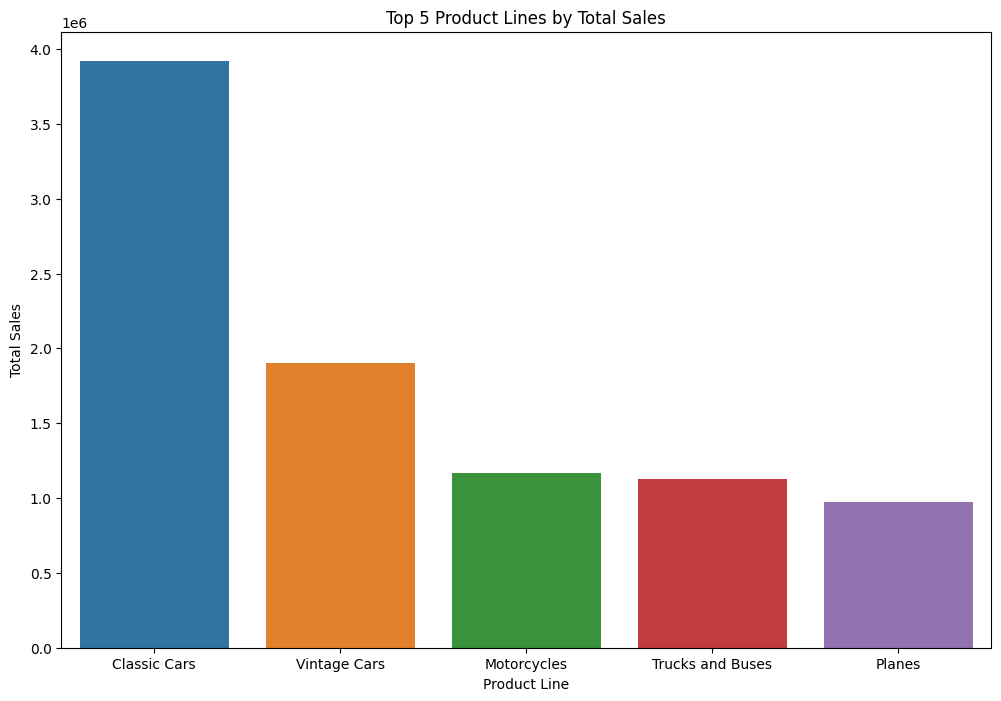

In [ ]:
top_product_line = df.groupBy("PRODUCTLINE").agg(F.sum("SALES").alias("TOTAL_SALES"))\
    .orderBy(F.col("TOTAL_SALES").desc()).limit(5).toPandas()

top_product_line


plt.figure(figsize=(12,8))
sns.barplot(data=top_product_line, x = "PRODUCTLINE", y = "TOTAL_SALES".toPandas()
)

plt.title("Top 5 Product Lines by Total Sales")
plt.xlabel("Product Line")
plt.ylabel("Total Sales")
plt.show()

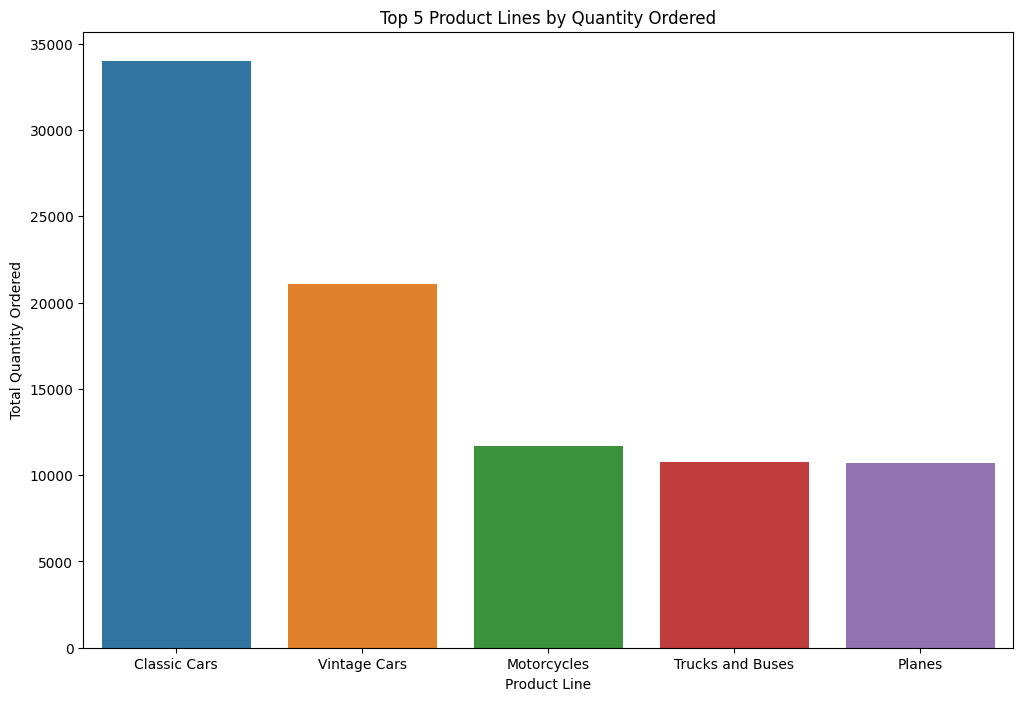

In [56]:
top_quantity_sold = df.groupBy("PRODUCTLINE").agg(F.sum("QUANTITYORDERED").alias("TOTAL_QUANTITYORDERED"))\
    .orderBy(F.col("TOTAL_QUANTITYORDERED").desc()).limit(5).toPandas()
    
    
plt.figure(figsize=(12,8))
sns.barplot(data=top_quantity_sold, x = "PRODUCTLINE", y = "TOTAL_QUANTITYORDERED")

plt.title("Top 5 Product Lines by Quantity Ordered")
plt.xlabel("Product Line")
plt.ylabel("Total Quantity Ordered")
plt.show()

### 1.1.2. Line chart

Line Charts in Data Analysis

• Supports monitoring of data behavior.

• Highlights differences and correlations within data.

• Helps viewers make predictions about future events.

• Emphasizes changes in a metric on the Y-axis by another variable on the X-axis.

In [111]:
country_sales = df.groupBy("COUNTRY").agg(F.sum("SALES").alias("TOTAL_SALES"))\
    .orderBy(F.col("TOTAL_SALES").desc()).limit(5).toPandas()

In [151]:
country_quantity = df.groupBy("COUNTRY").agg(F.sum("QUANTITYORDERED").alias("TOTAL_QUANTITY"))\
    .orderBy(F.col("TOTAL_QUANTITY").desc()).limit(5).toPandas()
    
country_quantity

,COUNTRY,TOTAL_QUANTITY
0,USA,35659
1,Spain,12429
2,France,11090
3,Australia,6246
4,UK,5013


**Q2: How do sales vary by country?**

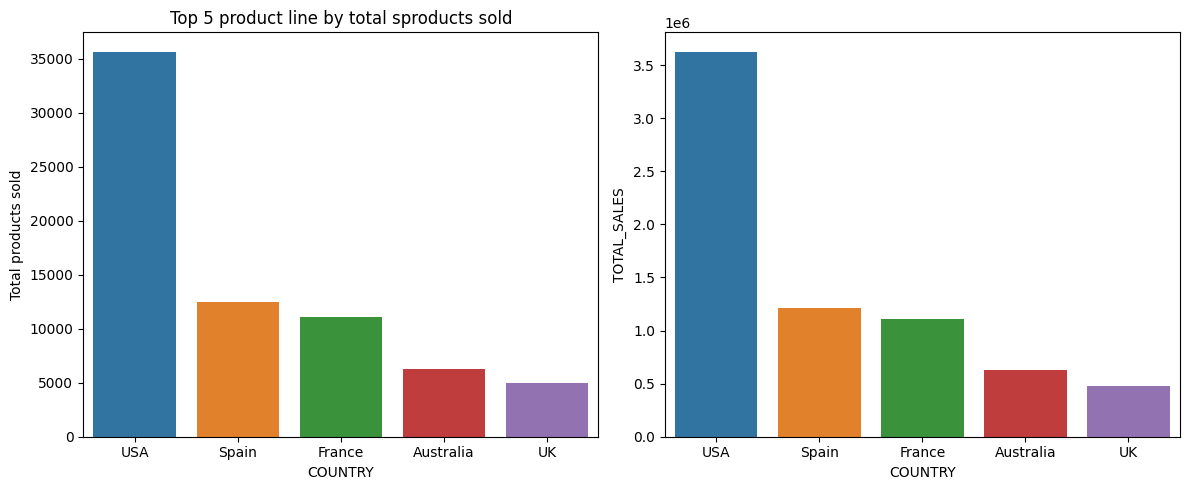

In [117]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(data=country_quantity, x = "COUNTRY", y = "TOTAL_QUANTITY", ax=ax[0])
sns.barplot(data=country_sales, x = "COUNTRY", y = "TOTAL_SALES", ax=ax[1])


# plt.figure(figsize=(12,6))
# sns.barplot(data=country_sales, x = "COUNTRY", y = "TOTAL_SALES")

ax[0].set_title("Top 5 product line by total sproducts sold")
# plt.xlabel("Country")
ax[0].set_ylabel("Total products sold")
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 1.1.3. Pie chart

Pie Chart Overview:

• Depicts the relationship of parts to the whole for a categorical variable.

• Each segment represents the proportional contribution of a specific category to the whole.

• Helps understand the parts-to-a-whole relationship, especially when visualizing a small number of categories.

• Used for categorical data, including nominal and ordinal data.

• Not suitable for situations requiring multiple categories, precise numerical comparisons, or showing changes over time.

**Categorical Data Color Palette:**

+ Dark blue: #12436D
+ Turquoise: #28A197
+ Dark pink: #801650
+ Orange: #F46A25
+ Dark grey: #3D3D3D
+ Purple: #A285D1
***
**Alternative Color Schemes:**

+ #2085ec (Tint of dodgerblue)
+ #72b4eb (Tint of lightskyblue)
+ #0a417a (Tint of darkslateblue)
+ #8464a0 (Tint of mediumpurple)
+ #cea9bc (Tint of thistle)
+ #323232 (Shade of Black)
***
**Simple Pie Chart Color Scheme:**

+ Burnt Sienna: #EC6B56
+ Crayola's Maize: #FFC154
+ Keppel: #47B39C
***
**Standard Color Names:**

+ Red: #FF0000
+ Green: #00FF00
+ Blue: #0000FF
+ Cyan: #00FFFF
+ Magenta: #FF00FF
+ Yellow: #FFFF00
+ Black: #000000
+ White: #FFFFFF
***

In [119]:
deal_size = df.groupBy("DEALSIZE").count().toPandas()
deal_size

,DEALSIZE,count
0,Medium,1384
1,Small,1282
2,Large,157


**Q3: What is the distribution of deal sizes?**

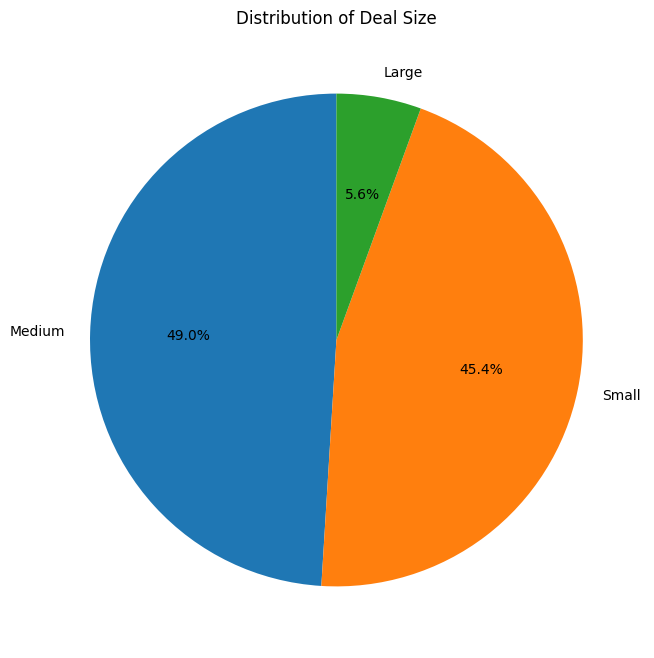

In [133]:
plt.figure(figsize=(12,8))
plt.pie(deal_size["count"], labels=deal_size["DEALSIZE"], autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Deal Size")
plt.show()

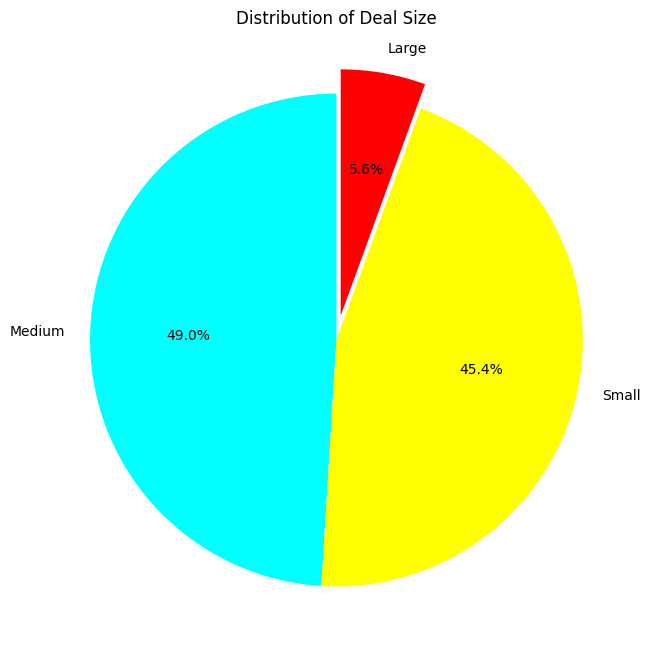

In [139]:
colours = ["#00FFFF", "#FFFF00", "#FF0000"]
explode = (0,0,0.1)

plt.figure(figsize=(12,8))
plt.pie(deal_size["count"], labels=deal_size["DEALSIZE"], autopct="%1.1f%%", startangle=90, colors=colours, explode=explode)
plt.title("Distribution of Deal Size")
plt.show()

In [147]:
deal_sales = df.groupBy("DEALSIZE").agg(F.sum("SALES").alias("TOTAL_SALES"))\
    .orderBy(F.col("TOTAL_SALES").desc()).toPandas()
deal_sales

,DEALSIZE,TOTAL_SALES
0,Medium,6087432.24
1,Small,2643077.35
2,Large,1302119.26


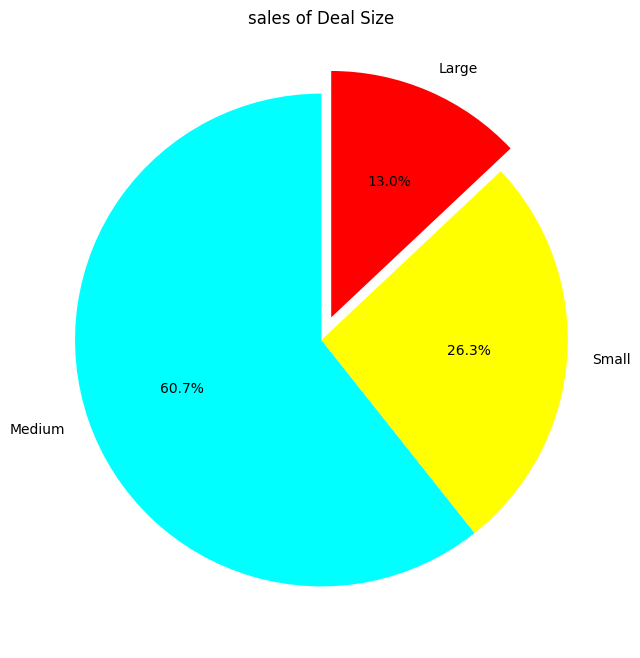

In [146]:
colours = ["#00FFFF", "#FFFF00", "#FF0000"]
explode = (0,0,0.1)

plt.figure(figsize=(12,8))
plt.pie(deal_sales["TOTAL_SALES"], labels=deal_size["DEALSIZE"], autopct="%1.1f%%", startangle=90, colors=colours, explode=explode)
plt.title("sales of Deal Size")
plt.show()

**Q4: Who are the top 10 customers by total purchase amount?**

**Q5: What is the relationship between quantity ordered and price each?**

In [173]:
quan_price = df.select("QUANTITYORDERED", "PRICEEACH", "DEALSIZE").toPandas()

quan_price


,QUANTITYORDERED,PRICEEACH,DEALSIZE
0,30,95.70,Small
1,34,81.35,Small
2,41,94.74,Medium
3,45,83.26,Medium
4,49,100.00,Medium
...,...,...,...
2818,20,100.00,Small
2819,29,100.00,Medium
2820,43,100.00,Medium
2821,34,62.24,Small


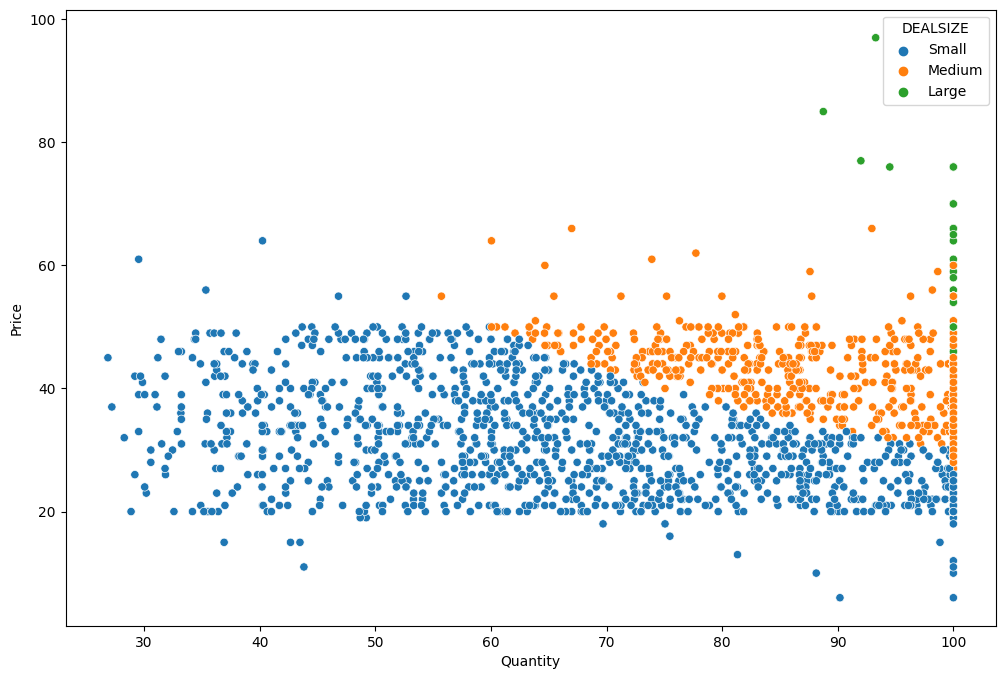

In [171]:

plt.figure(figsize=(12,8))
sns.scatterplot(data=quan_price, y="QUANTITYORDERED", x="PRICEEACH", hue="DEALSIZE")
plt.xlabel("Quantity")
plt.ylabel("Price")
plt.show()